# Методы отбора признаков

## Импорты

In [318]:
from collections import Counter
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

## Загрузка данных

In [319]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("../data/bank_churners_preprocessed.csv", index_col=0)
data

Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
0                   0            45                3                2   
1                   0            49                5                5   
2                   0            51                3                5   
3                   0            40                4                2   
4                   0            40                3                1   
...               ...           ...              ...              ...   
10122               0            50                2                5   
10123               1            41                2                0   
10124               1            44                1                2   
10125               1            30                2                5   
10126               1            43                2                5   

       Income_Category  Card_Category  Months_on_book  \
0                    3              0              39   
1                    1              0              44   
2                    4              0              36   
3                    1              0              34   
4                    3              0              21   
...                ...            ...             ...   
10122                2              0              40   
10123                2              0              25   
10124                1              0              36   
10125                2              0              36   
10126                1              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                          3  ...             1144              42   
1                          2  ...             1291              33   
2                          0  ...             1887              20   
3                          1  ...             1171              20   
4                          0  ...              816              28   
...                      ...  ...              ...             ...   
10122                      3  ...            15476             117   
10123                      3  ...             8764              69   
10124                      4  ...            10291              60   
10125                      3  ...             8395              62   
10126                      4  ...            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  c_F  c_M  c_Divorced  \
0                    1.625                  0.061    0    1           0   
1                    3.714                  0.105    1    0           0   
2                    2.333                  0.000    0    1           0   
3                    2.333                  0.760    1    0           0   
4                    2.500                  0.000    0    1           0   
...                    ...                    ...  ...  ...         ...   
10122                0.857                  0.462    0    1           0   
10123                0.683                  0.511    0    1           1   
10124                0.818                  0.000    1    0           0   
10125                0.722                  0.000    0    1           0   
10126                0.649                  0.189    1    0           

In [320]:
data.describe()

Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
count    10127.000000  10127.000000     10127.000000     10127.000000   
mean         0.160660     46.325960         2.346203         2.872717   
std          0.367235      8.016814         1.298908         1.964401   
min          0.000000     26.000000         0.000000         0.000000   
25%          0.000000     41.000000         1.000000         1.000000   
50%          0.000000     46.000000         2.000000         3.000000   
75%          0.000000     52.000000         3.000000         5.000000   
max          1.000000     73.000000         5.000000         6.000000   

       Income_Category  Card_Category  Months_on_book  \
count     10127.000000   10127.000000    10127.000000   
mean          2.085711       0.083638       35.928409   
std           1.474639       0.333784        7.986416   
min           0.000000       0.000000       13.000000   
25%           1.000000       0.000000       31.000000   
50%           2.000000       0.000000       36.000000   
75%           3.000000       0.000000       40.000000   
max           5.000000       3.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  ...  Total_Trans_Amt  Total_Trans_Ct  \
count           10127.000000  ...     10127.000000    10127.000000   
mean                2.455317  ...      4404.086304       64.858695   
std                 1.106225  ...      3397.129254       23.472570   
min                 0.000000  ...       510.000000       10.000000   
25%                 2.000000  ...      2155.500000       45.000000   
50%                 2.000000  ...      3899.000000       67.000000   
75%                 3.000000  ...      4741.000000       81.000000   
max                 6.000000  ...     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio           c_F           c_M  \
count         10127.000000           10127.000000  10127.000000  10127.000000   
mean              0.712222               0.274894      0.529081      0.470919   
std               0.238086               0.275691      0.499178      0.499178   
min               0.000000               0.000000      0.000000      0.000000   
25%               0.582000               0.023000      0.000000      0.000000   
50%               0.702000               0.176000      1.000000      0.000000   
75%               0.818000               0.503000      1.000000      1.000000   
max               3.714000               0.999000      1.000000      1.000000   

         c_Divorced     c_Married      c_Single     c_Unknown  
count  10127.000000  10127.000000  10127.000000  10127.000000  
mean       0.073862      0.462822      0.389355      0.073961  
std        0.261559      0.498641      0.487628      0.261720  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000      0.000000  
75%        0.000000      1.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000      1.000000  

[8 rows x 24 columns]

In [321]:
data[['Total_Trans_Amt', 'Total_Trans_Ct']] = StandardScaler().fit_transform(data[['Total_Trans_Amt', 'Total_Trans_Ct']])
data


Attrition_Flag  Customer_Age  Dependent_count  Education_Level  \
0                   0            45                3                2   
1                   0            49                5                5   
2                   0            51                3                5   
3                   0            40                4                2   
4                   0            40                3                1   
...               ...           ...              ...              ...   
10122               0            50                2                5   
10123               1            41                2                0   
10124               1            44                1                2   
10125               1            30                2                5   
10126               1            43                2                5   

       Income_Category  Card_Category  Months_on_book  \
0                    3              0              39   
1                    1              0              44   
2                    4              0              36   
3                    1              0              34   
4                    3              0              21   
...                ...            ...             ...   
10122                2              0              40   
10123                2              0              25   
10124                1              0              36   
10125                2              0              36   
10126                1              1              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  ...  Total_Trans_Amt  Total_Trans_Ct  \
0                          3  ...        -0.959707       -0.973895   
1                          2  ...        -0.916433       -1.357340   
2                          0  ...        -0.740982       -1.911206   
3                          1  ...        -0.951758       -1.911206   
4                          0  ...        -1.056263       -1.570365   
...                      ...  ...              ...             ...   
10122                      3  ...         3.259358        2.221481   
10123                      3  ...         1.283475        0.176440   
10124                      4  ...         1.732994       -0.207005   
10125                      3  ...         1.174848       -0.121795   
10126                      4  ...         1.733877       -0.164400   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  c_F  c_M  c_Divorced  \
0                    1.625                  0.061    0    1           0   
1                    3.714                  0.105    1    0           0   
2                    2.333                  0.000    0    1           0   
3                    2.333                  0.760    1    0           0   
4                    2.500                  0.000    0    1           0   
...                    ...                    ...  ...  ...         ...   
10122                0.857                  0.462    0    1           0   
10123                0.683                  0.511    0    1           1   
10124                0.818                  0.000    1    0           0   
10125                0.722                  0.000    0    1           0   
10126                0.649                  0.189    1    0           

In [322]:
y = data["Attrition_Flag"]
X = data.drop(columns=["Attrition_Flag"])
columns = X.columns

In [323]:
counter = Counter(y)
print(counter)

Counter({0: 8500, 1: 1627})


In [324]:
X, y = SMOTE().fit_resample(X, y)

In [325]:
counter = Counter(y)
print(counter)

Counter({0: 8500, 1: 8500})


In [326]:
etc = ExtraTreesClassifier().fit(X, y)
selected_pairs = sorted(list(zip(columns, etc.feature_importances_)),
                   key=lambda pair: -pair[1])[:3]
selected = [pair[0] for pair in selected_pairs]
selected

['Total_Trans_Ct', 'Total_Revolving_Bal', 'Total_Trans_Amt']

In [327]:
X

Customer_Age  Dependent_count  Education_Level  Income_Category  \
0                45                3                2                3   
1                49                5                5                1   
2                51                3                5                4   
3                40                4                2                1   
4                40                3                1                3   
...             ...              ...              ...              ...   
16995            52                1                3                2   
16996            43                0                0                4   
16997            45                1                1                1   
16998            41                3                1                1   
16999            43                4                5                3   

       Card_Category  Months_on_book  Total_Relationship_Count  \
0                  0              39                         5   
1                  0              44                         6   
2                  0              36                         4   
3                  0              34                         3   
4                  0              21                         5   
...              ...             ...                       ...   
16995              0              44                         3   
16996              0              44                         3   
16997              0              27                         2   
16998              0              36                         1   
16999              0              34                         4   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  ...  \
0                           1                      3  12691.000000  ...   
1                           1                      2   8256.000000  ...   
2                           1                      0   3418.000000  ...   
3                           4                      1   3313.000000  ...   
4                           1                      0   4716.000000  ...   
...                       ...                    ...           ...  ...   
16995                       2                      3   4596.562899  ...   
16996                       4                      4  13176.911574  ...   
16997                       3                      2   2971.624072  ...   
16998                       2                      3   3604.561038  ...   
16999                       2                      2  10671.415291  ...   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0            -0.959707       -0.973895             1.625000   
1            -0.916433       -1.357340             3.714000   
2            -0.740982       -1.911206             2.333000   
3            -0.951758       -1.911206             2.333000   
4            -1.056263       -1.570365             2.500000   
...                ...             ...                  ...   
16995         0.189803       -0.347915             0.769839   
16996         0.190746       -0.108271             0.547483   
16997        -0.951102       -1.368610             0.441501   
16998        -0.748647       -1.025789             0.515555   
16999        -0.636616       -0.802770             0.465054   

       Avg_Utilization_Ratio  c_F  c_M  c_Divorced  c_Married  c_Single  \
0                   0.061000    0    1           0          1         0   
1                   0.105000    1    0           0          0         1   
2                   0.000000    0    1           0          1         0   
3                   0.760000    1    0           0          0         0   
4                   0.000000    0    1           0          1         0   
...                      ...  ...  ...         ...        ...       ...   
16995               0.000000    0    1           0          0         0   
16996               0.176992    0    1           0          0      

## 1. Метод K-средних

In [328]:
kmeans = KMeans(n_clusters=2, random_state=200, max_iter=1000).fit(X)
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.7560854075654647

In [329]:
success_count = 0
for pair in zip(y, kmeans.labels_):
    if pair[0] == pair[1]:
        success_count = success_count + 1
success_count / y.shape[0]


0.5089411764705882

## 2. Метод K-средних (с уменьшением размерности)

In [330]:
kmeans = KMeans(n_clusters=2).fit(X[selected])
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.04464811478575519

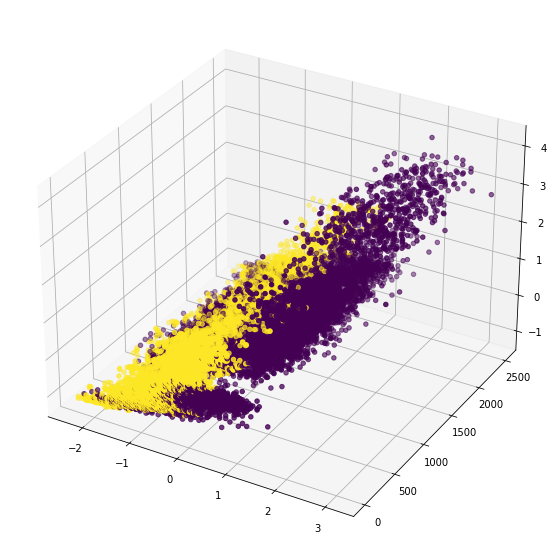

In [331]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=X[selected[0]], ys=X[selected[1]], zs=X[selected[2]], c=y)
plt.show()

In [332]:
success_count = 0
for pair in zip(y, kmeans.labels_):
    if pair[0] == pair[1]:
        success_count = success_count + 1
success_count / y.shape[0]

0.7000588235294117

## 3. TSNE

In [333]:
transformed_3d = TSNE(n_components=3).fit_transform(X)

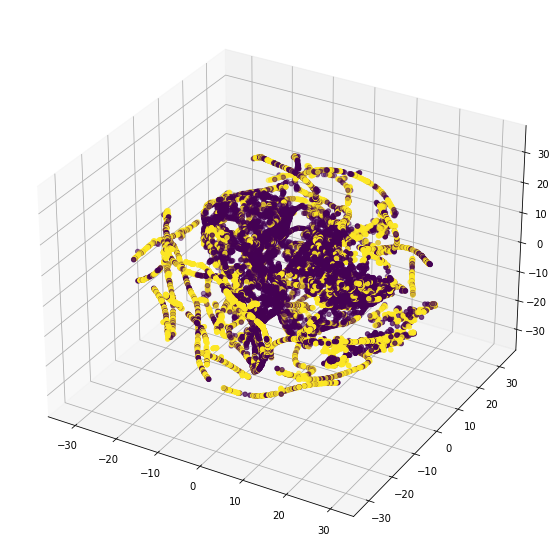

In [334]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(xs=transformed_3d[:, 0], ys=transformed_3d[:, 1], zs=transformed_3d[:, 2], c=y)
plt.show()

In [335]:
transformed_2d = TSNE(n_components=2).fit_transform(X)

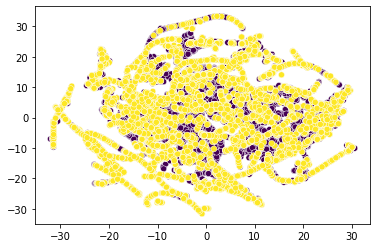

In [336]:
sns.scatterplot(x=transformed_3d[:, 0], y=transformed_3d[:, 1], c=y)
plt.show()

## 4. DBSCAN

In [337]:
dbscan = DBSCAN().fit(X)
set(dbscan.labels_)

{-1}

In [338]:
pca_2d = PCA(n_components=2).fit_transform(X)

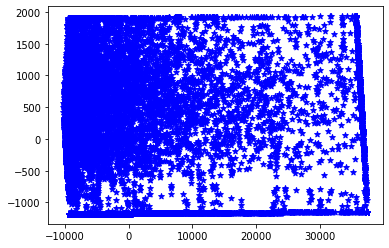

In [339]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.show()

## 5. Иерархическая кластеризация

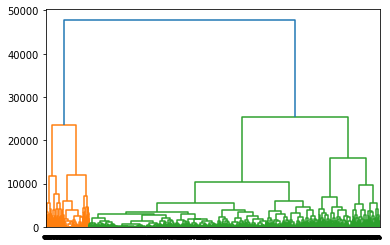

In [340]:
l = linkage(X.values, method='complete')
dendrogram(l,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()